In [54]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from scipy.stats import sem
from sklearn.metrics import RocCurveDisplay

In [55]:
#load training data
dataDir = 'CleanData'
path = os.path.join(dataDir, 'train.csv')
train = pd.read_csv (path, index_col = 'HHX')
#separate target and features
target = 'PHQCAT_A'
train_y = train[target]
train_x = train.drop(columns=[target])

In [56]:
#load testing 
datadataDir = 'CleanData'
path = os.path.join(dataDir, 'test.csv')
test = pd.read_csv (path, index_col = 'HHX')
#separate target and features
target = 'PHQCAT_A'
test_y = train[target]
test_x = train.drop(columns=[target])

In [58]:
#create random forest object
RFC = RandomForestClassifier(random_state = 0)
#run 10-fold cross validation, get ROC_AUC scores
scores = cross_val_score(RFC, train_x, train_y, cv=10, scoring = 'roc_auc_ovr_weighted')
print(scores)
print (np.std (scores))

[0.98224779 0.98322076 0.98164761 0.98251455 0.98141084 0.98473776
 0.98320097 0.98493235 0.98126173 0.98382546]
0.0012490676521819393


In [60]:
#train using all data
RFC_alldata = RFC.fit(train_x, train_y)

In [31]:
#calculate weighted avg roc AUC for testing data
roc_auc_test = roc_auc_score(test_y, RFC_alldata.predict_proba(test_x), multi_class='ovr', average='weighted')
roc_auc_test

1.0

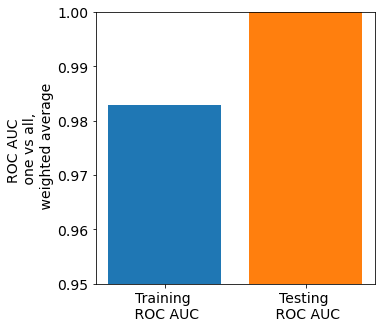

In [61]:
#plot scores
fig, ax = plt.subplots(figsize = (5, 5))
#training score mean w/ sem
ax.bar(1, np.mean(scores))
ax.errorbar(1, np.std(scores))
#testing score
ax.bar(2, roc_auc_test)

ax.set_ylabel('ROC AUC \n one vs all, \n weighted average', fontsize = 14)
ax.set_ylim(bottom = 0.95, top = 1)

ax.set_xticks([1, 2])
ax.set_xticklabels (['Training \n ROC AUC', 'Testing \n ROC AUC'], fontsize = 14)

plt.yticks(fontsize = 14)

plt.show()